In [ ]:
import autograd.numpy as np

layers_sizes = [100,25,4]

n_hidden = np.size(layers_sizes)
print(n_hidden)

P = [None]*(n_hidden + 1)
print(len(P))
 
P[0] = np.random.randn(layers_sizes[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
#print(P[0])
for l in range(1,n_hidden):
    P[l] = np.random.randn(layers_sizes[l], layers_sizes[l-1] + 1) # +1 to include bias

P[-1] = np.random.randn(1,layers_sizes[-1]+1)
#print(P[-1])

for i in range(len(P)):
    print(P[i].shape)

In [ ]:
num_points = 1; x_prev = [[4],[3]]

x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)
print(x_prev)

a = np.linspace(0,1,2)
print(a)
print(a[:-1])

In [ ]:
import numpy as np
from support import *
Nx,Ny,Nt = 100,100,100
x,y,t = np.linspace(-1,1,Nx),np.linspace(-1,1,Ny),np.linspace(0,1,Nt)

xx,tt = np.meshgrid(x,t)
xgrid = np.vstack([xx.flatten(),tt.flatten()]).T
print(xgrid.shape)
x_,t_ = xgrid[:,0], xgrid[:,1]
L = 2.
mu = 0.000001/np.pi
eig = (np.pi**2*mu)/(2.*L**2)
print(np.exp(eig))
#sol = -2.*(np.pi*mu*np.cos(np.pi*x_/L))/(np.sin(np.pi*x_/L) - np.exp(eig*t_))

sol = -np.sin(np.pi*x_)*np.exp(-mu*np.pi**2*t_)

sol = sol.reshape(Nx,Nt)
print(sol.shape)

plot2D(xx,tt,sol)

tf.Tensor([ 0. -1.], shape=(2,), dtype=float32) tf.Tensor([1. 1.], shape=(2,), dtype=float32)
X0 (50, 2)
Xb (50, 2)
Xr (10000, 2)
flow
x (50, 1)
u0 (50, 1)
ub (50, 1)


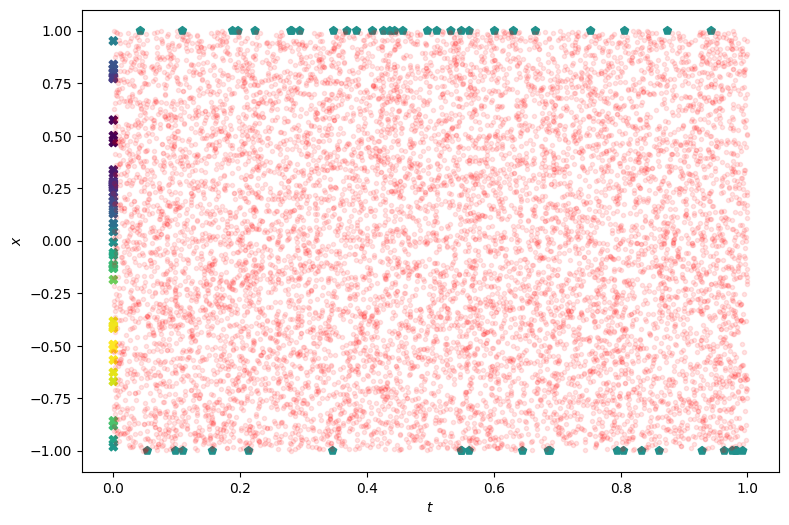

In [2]:
from networkFlowTorch import *
from PDEq import *
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)

layer_out_sizes = [20,20,20,20,20,20,20,20,1]

hidden_func = 'gelu' # sigmoid, relu, elu, leaky_relu, tanh, swish, gelu, hard_sigmoid, exponential

act_funcs = []; act_ders = []
for i in range(len(layer_out_sizes)-1):
    act_funcs.append(hidden_func)

act_funcs.append(None); 

#PDE = Diffusion1D(sim_type='flow')
PDE = Burger1D(sim_type='flow')
#PDE = Wave1D(sim_type='flow')
f = PDE.right_hand_side

Nt,Nx = 100,100
T0,T,L0,Lx = 0,1,-1,1

x_bound = [L0,Lx]; t_lim = [T0,T]
x = np.linspace(x_bound[0],x_bound[1],Nx)
t = np.linspace(t_lim[0],t_lim[1],Nt)
        
domain_array = anp.array([t,x])
lmbda = 1e-6
        
network = FFNNetworkFlow(layer_output_size=layer_out_sizes,
                                activation_functions=act_funcs,
                                PDE=PDE,
                                source_function=f,
                                domain_array=domain_array,
                                domain=x_bound,
                                gd_method='adam',
                                learning_rate=None)
        
network.collocation_setup(bounds=(x_bound,t_lim),colloc_points=10000,
                                bound_points=50,init_points=50)

In [6]:
network.create_layers(lmbda=lmbda)
print(network.model.layers)

[<Lambda name=lambda_2, built=True>, <Dense name=dense_18, built=True>, <Dense name=dense_19, built=True>, <Dense name=dense_20, built=True>, <Dense name=dense_21, built=True>, <Dense name=dense_22, built=True>, <Dense name=dense_23, built=True>, <Dense name=dense_24, built=True>, <Dense name=dense_25, built=True>, <Dense name=dense_26, built=True>]


(100, 100, 100)
(100, 100, 100)
(100, 100, 100)


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

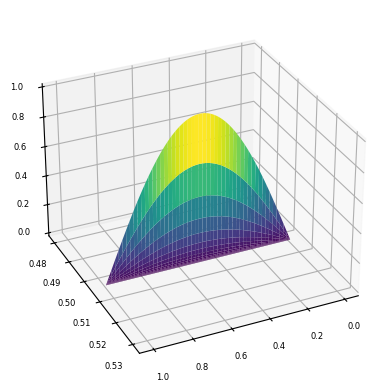

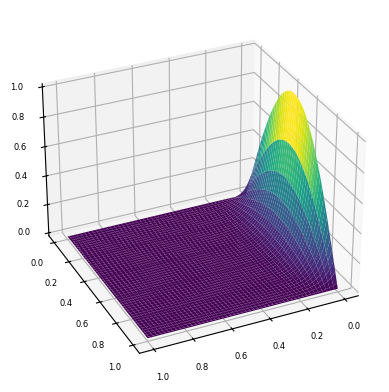

In [22]:
Nt,Nx,Ny = 100,100,100

t0,x0,y0 = 0,0,0
T,Lx,Ly = 1,1,1
t_lim = [t0,T]; x_bound = [x0,Lx]; y_bound = [y0,Ly]
t = np.linspace(t_lim[0],t_lim[1],Nt)
x = np.linspace(x_bound[0],x_bound[1],Nx)
y = np.linspace(y_bound[0],y_bound[1],Ny)
        
domain_array = (t,x,y)

tt,xx,yy = np.meshgrid(t,x,y,indexing='ij')
print(tt.shape)
print(xx.shape)
print(yy.shape)

xgrid = np.vstack([tt.flatten(),xx.flatten(),yy.flatten()]).T
x_, y_, t_ = xgrid[:,1],xgrid[:,2],xgrid[:,0]
eig = anp.pi**2*(1/Lx**2 + 1/Ly**2)

f = anp.sin(anp.pi*x_/Lx)*anp.sin(anp.pi*y_/Ly)*anp.exp(-eig*t_)
f_re = f.reshape(Nt,Nx,Ny)

plot2D(xx[:,:,50],yy[:,:,50],f_re[:,:,50])
plot2D(xx[50,:,:],yy[50,:,:],f_re[:,:,50])

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x_ = np.linspace(-1,1,100)
t_ = np.linspace(-1,1,100)

x,t,c,L = sp.symbols('x,t,c,L')

f = sp.exp(-sp.pi**2 * t/(L**2)) * sp.sin(sp.pi * x/L)

f_num = sp.lambdify(x, f.subs({L: 1, t: t_}))

f_val = f_num(x_)
print(f_val.shape)

plt.plot(x_,f_val)


SympifyError: SympifyError: array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39393939,
        0.41414141,  0.43434343,  0.45454545,  0.47474747,  0.49494949,
        0.51515152,  0.53535354,  0.55555556,  0.57575758,  0.5959596 ,
        0.61616162,  0.63636364,  0.65656566,  0.67676768,  0.6969697 ,
        0.71717172,  0.73737374,  0.75757576,  0.77777778,  0.7979798 ,
        0.81818182,  0.83838384,  0.85858586,  0.87878788,  0.8989899 ,
        0.91919192,  0.93939394,  0.95959596,  0.97979798,  1.        ])